# **`Task 3- Explore Unsupervised Machine Learning`**

## **Table of Contents**
**1.** [Problem Statement.](#prbstmt) <br>
**2.** [Data Exploration.](#datexp) <br> 
**3.** [Finding Optimum No.Of Clusters.](#fonoc) <br>
**4.** [Implementing K-Means Clustering Algorithm.](#Imkmc) <br>
**5.** [Visualization of Clusters.](#voc) <br>

<a id='prbstmt'></a>
## 1. Problem Statement
We have given a **[data set](https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view?usp=sharing)** of iris flower which contains 6 columns as:
- **1-> Id** 
- **2-> SepalLengthCm -** Length of Sepal of flower in cm's <br/>
- **3-> SepalWidthCm  -** Width of Sepal of flower in cm's <br/>
- **4-> PetalLengthCm -** Length of Petal of flower in cm's <br/>
- **3-> PetalWidthCm  -** Width of Petal of flower in cm's <br/>
- **5-> Species -** Types of Iris Flower <br/>

So from the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

<a id='datexp'></a>
## 2. Data Exploration
This **[data set](https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view?usp=sharing)** contains 6 columns as described above **Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, Species**

In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

In [2]:
dir(load_iris())

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [3]:
load_iris().target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
df = pd.DataFrame(data=load_iris().data , columns=load_iris().feature_names)

df['targets'] = load_iris().target
df['label'] = df.targets
df['label']=df.targets.apply(lambda x: load_iris().target_names[int(x)] )
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),targets,label
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


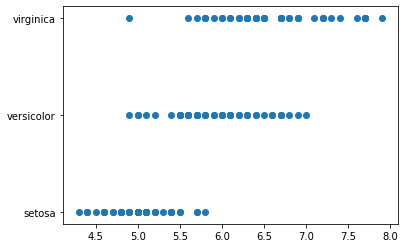

In [5]:
# Ploting some of features with the targets of data set.
plt.scatter(df['sepal length (cm)'], df['label'])

#plt.scatter(df['sepal width (cm)'], df['label'])
#plt.scatter(df['petal length (cm)'], df['label'])
#plt.scatter(df['petal width (cm)'], df['label'])

**As we can see from the above visualization their are 3 categories of flower in this dataset**

**So to predict optimum no. of cluseters we use KMeans Clustering algorithm**

<a id='fonoc'></a>
## 3. Finding Optimum Number of Cluseters.

For finding the optimum number of clusters we use **Elbow Method** here.

In [6]:
x = df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []    # within cluster sum of squares

for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

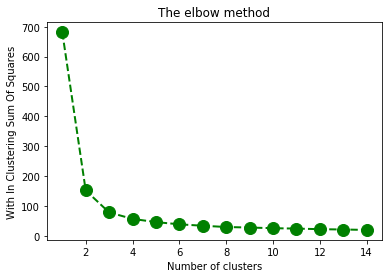

In [7]:
# Now we observe 'The elbow' by plotiing the results 
plt.plot(range(1, 15), wcss, 'go--', linewidth=2, markersize=12)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('With In Clustering Sum Of Squares') 
plt.show()

From the above visualization we can say that the **optimum number of clusters as 3**
becasue within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration here.

<a id='Imkmc'></a>
## 4. Implementing K-Means Clustering Algorithm.

In [8]:
# Creating Classfier.
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 1)
y_kmeans = kmeans.fit_predict(x)

<a id='voc'></a>
## 5. Visualization of Clusters.

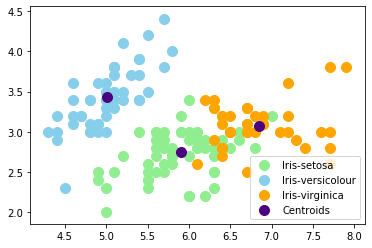

In [9]:
# Now we visualising the clusters - On the first two columns

# Cluster 1.
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'lightgreen', label = 'Iris-setosa')

# Cluster 2.
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'skyblue', label = 'Iris-versicolour')

# Cluster 3.
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'orange', label = 'Iris-virginica')


# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'indigo', label = 'Centroids')

plt.legend()

Now we can see from above visualization our data set have **3 clusters or 3 types of IRIS FLOWERS:**<br> 
1. Iris-setosa 
2. Iris-versicolour
3. Iris-virginica